# INTRODUCTION

Code produced by Zainab Akhtar

**Imports**

In [92]:
import pandas as pd
import numpy as np
# import gdown
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import seaborn as sns
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import FeatureUnion
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from tensorflow.keras.utils import timeseries_dataset_from_array
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Flatten, Dense
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Bidirectional
# from sklearn.model_selection import GridSearchCV, cross_val_score, TimeSeriesSplit
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Utility Functions**


In [74]:
# Function to extract information about the Data Frame.
def data_review(df):
  info = {
      'Number of Rows': df.shape[0],
      'Number of Columns': df.shape[1],
      'Missing Values': df.isnull().sum().sum(),
      'Duplicate Values': df.duplicated().sum(),
  }

  return info

**Note:**

MinMaxScaler is preferred over StandardScaler in the following scenarios:

- When the data is not normally distributed.
- When training and predicting with neural networks.
- When features have different units, indicating varying scales.

# DATA PREPROCESSING

**Data Loading and Review**

In [93]:
# Load data into a Pandas data frame.
file_path = '../data/final_dataset.csv'
data = pd.read_csv(file_path)

# Convert 'Date' and 'Time' columns to datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Extract date and time features
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute

# Drop original 'Date' and 'Time' columns
data.drop(['Date', 'Time', 'DateTime','Classroom Category','Device Code','Measured RH','Measured CO2','Measured PM1.0','Measured PM2.5','Measured PM10','Grade','Room No','BattV_Min','Batt24V_Min','School No','Tracker2WM_Avg'], axis=1, inplace=True)

info = data_review(data)

# Convert info into DataFrames for clear display.
info = pd.DataFrame.from_dict(info, orient='index', columns=[''])

print('Data review:')
print(info)

Data review:
                         
Number of Rows     372084
Number of Columns      25
Missing Values       4435
Duplicate Values     1363


**Observations:** Since there are 25 features, our time-series analysis will be multivariate. There are no duplicate values, but there are missing values that need to be be dealt with.

In [94]:
# Review the feature names in the data.
data.columns.to_list()

['Classroom Type',
 'Measured T',
 'School Day',
 'School Hours',
 'Break Time',
 'Power On',
 'Outdoor Temperature',
 'TmStamp',
 'TrackerWM_Avg',
 'ShadowWM_Avg',
 'SunWM_Avg',
 'ShadowbandWM_Avg',
 'DNICalc_Avg',
 'AirTC_Avg',
 'RH',
 'WS_ms_S_WVT',
 'WindDir_D1_WVT',
 'WindDir_SD1_WVT',
 'BP_mB_Avg',
 'UVA_Avg',
 'UVB_Avg',
 'Month',
 'Day',
 'Hour',
 'Minute']

In [95]:
# Review the first five observations in the data.
data.head()

,Classroom Type,Measured T,School Day,School Hours,Break Time,Power On,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,...,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
0,Container No Insulation,20.8,Y,N,N,On,18.20144,08/02/2023 7:34,667.20605,51.265274,...,5.075,247.1,20.59,997.78815,0.020623,0.009368,2,8,7,34
1,Container No Insulation,22.0,Y,N,N,On,19.38780,08/02/2023 7:57,751.83340,59.186935,...,5.238,247.0,24.80,997.79270,0.020280,0.009368,2,8,7,57
2,Container No Insulation,23.3,Y,Y,N,Off,20.14053,08/02/2023 8:20,812.35530,64.872480,...,5.788,249.3,27.40,997.81710,0.020623,0.009368,2,8,8,20
3,Container No Insulation,22.7,Y,Y,N,Off,20.51689,08/02/2023 8:30,834.31120,66.790970,...,5.188,240.8,24.80,997.83890,0.020280,0.009368,2,8,8,30
4,Container No Insulation,24.4,Y,Y,N,Off,21.08144,08/02/2023 8:46,864.83730,69.757614,...,5.638,249.7,25.01,997.82200,0.020623,0.009368,2,8,8,46


In [96]:
# Review the last five observations in the data.
data.tail()

,Classroom Type,Measured T,School Day,School Hours,Break Time,Power On,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,...,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
372079,Mobile/Prefab,23.7,Y,Y,N,NaN,17.12235,07/11/2023 12:08,893.76760,284.48270,...,4.412,232.9,18.44,1003.7168,0.742443,0.086734,11,7,12,8
372080,Mobile/Prefab,25.0,Y,Y,N,NaN,17.12235,07/11/2023 12:09,889.50995,260.53555,...,3.687,256.5,15.96,1003.7231,0.742442,0.086734,11,7,12,9
372081,Mobile/Prefab,23.8,Y,Y,N,NaN,17.12235,07/11/2023 12:09,889.50995,260.53555,...,3.687,256.5,15.96,1003.7231,0.742442,0.086734,11,7,12,9
372082,Brick Single Story,25.6,Y,Y,Y,NaN,17.12235,07/11/2023 12:09,889.50995,260.53555,...,3.687,256.5,15.96,1003.7231,0.742442,0.086734,11,7,12,9
372083,Brick Single Story,25.7,Y,Y,Y,NaN,17.12235,07/11/2023 12:09,889.50995,260.53555,...,3.687,256.5,15.96,1003.7231,0.742442,0.086734,11,7,12,9


**Observations:** The initial and final rows of the dataset show hourly-minute observations from February 2, 2023, to November 7, 2023.

In [97]:
# Review the data types of the features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372084 entries, 0 to 372083
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Classroom Type       372084 non-null  object 
 1   Measured T           372079 non-null  float64
 2   School Day           372084 non-null  object 
 3   School Hours         372084 non-null  object 
 4   Break Time           372084 non-null  object 
 5   Power On             370580 non-null  object 
 6   Outdoor Temperature  372084 non-null  float64
 7   TmStamp              372084 non-null  object 
 8   TrackerWM_Avg        371404 non-null  float64
 9   ShadowWM_Avg         371428 non-null  float64
 10  SunWM_Avg            371746 non-null  float64
 11  ShadowbandWM_Avg     371968 non-null  float64
 12  DNICalc_Avg          371828 non-null  float64
 13  AirTC_Avg            371750 non-null  float64
 14  RH                   372006 non-null  float64
 15  WS_ms_S_WVT      

**Observations:** Numerical features are of type float64 or int32 whereas categorical features are object.

/Users/zainabakhtar/anaconda3/envs/thermo_dl_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


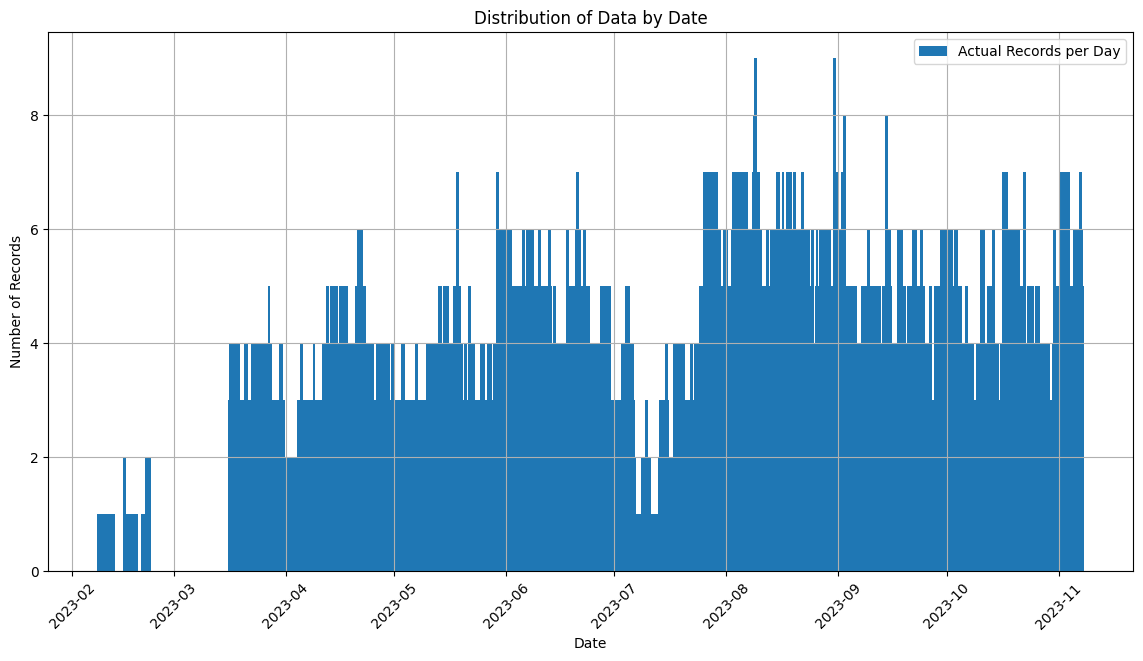

In [98]:
# Display the observations temporally

data['TmStamp'] = pd.to_datetime(data['TmStamp'], format='%d/%m/%Y %H:%M')

# Calculate the count of records per date
record_counts_per_date = data.groupby('TmStamp').size()

# Determine the date range in the dataset
date_range = pd.date_range(start=record_counts_per_date.index.min(), end=record_counts_per_date.index.max())

# Display the count of records per date and the missing dates
record_counts_per_date_df = record_counts_per_date.reset_index(name='Record Count')

# Plot the distribution of data by day and highlight days with missing data
plt.figure(figsize=(14, 7))
plt.bar(record_counts_per_date.index, record_counts_per_date, label='Actual Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Distribution of Data by Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations:** Since the dataset contains missing data between Feb to early March, we will remove those instances and focus only on the duration: 2023-03-16 to 2023-11-07.

In [99]:
# Filter the DataFrame based on the date range
start_date = '2023-03-16'
end_date = '2023-11-07'
data = data[(data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

/Users/zainabakhtar/anaconda3/envs/thermo_dl_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


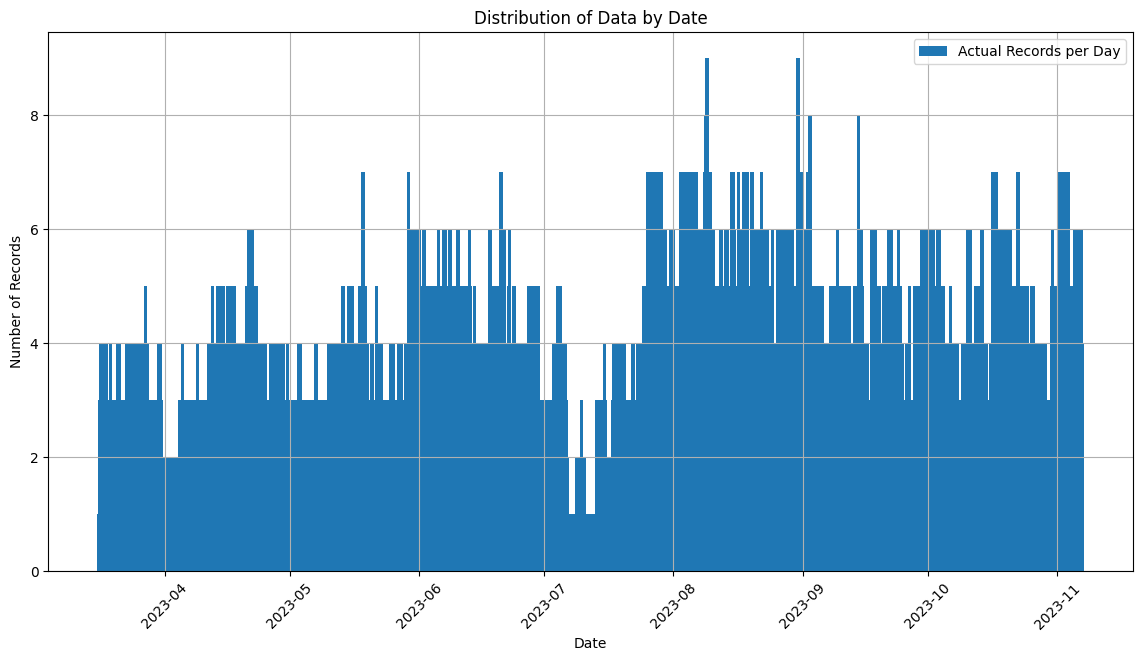

In [100]:
# Display the observations temporally - updated graph

data['TmStamp'] = pd.to_datetime(data['TmStamp'], format='%d/%m/%Y %H:%M')

# Calculate the count of records per date
record_counts_per_date = data.groupby('TmStamp').size()

# Determine the date range in the dataset
date_range = pd.date_range(start=record_counts_per_date.index.min(), end=record_counts_per_date.index.max())

# Display the count of records per date and the missing dates
record_counts_per_date_df = record_counts_per_date.reset_index(name='Record Count')

# Plot the distribution of data by day and highlight days with missing data
plt.figure(figsize=(14, 7))
plt.bar(record_counts_per_date.index, record_counts_per_date, label='Actual Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Distribution of Data by Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [101]:
#Check for missing data and impute
data.isnull().sum() 
#SimpleImputer will fill in these NA's as part of the pipeline --> for numerical the "median" will be used and for categorical "most frequent" will be used 

Classroom Type           0
Measured T               2
School Day               0
School Hours             0
Break Time               0
Power On                 0
Outdoor Temperature      0
TmStamp                  0
TrackerWM_Avg          680
ShadowWM_Avg           656
SunWM_Avg              338
ShadowbandWM_Avg       116
DNICalc_Avg            256
AirTC_Avg              332
RH                      78
WS_ms_S_WVT             78
WindDir_D1_WVT          78
WindDir_SD1_WVT         78
BP_mB_Avg               78
UVA_Avg                 78
UVB_Avg                 78
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

In [102]:
null_records = data[data['Measured T'].isnull()]
null_records

,Classroom Type,Measured T,School Day,School Hours,Break Time,Power On,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,...,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
77910,Mobile/Prefab,NaN,Y,N,N,On,11.98871,2023-06-07 00:41:00,0.148234,0.0,...,0.551,347.5,1.685,997.38184,0.247647,0.012159,6,7,0,41
114124,Mobile/Prefab,NaN,N,N,N,On,12.72053,2023-07-02 07:19:00,0.000000,0.0,...,0.804,285.1,7.139,1008.84467,0.149964,0.000000,7,2,7,19


In [103]:
filtered_data = data.dropna(subset=['Measured T'])
filtered_data = data.sort_values(by='TmStamp')
filtered_data = filtered_data.reset_index(drop=True)

In [104]:
filtered_data.shape[0]

369697

**Impute Missing Values**

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_33121/3472999007.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = filtered_data[(filtered_data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]


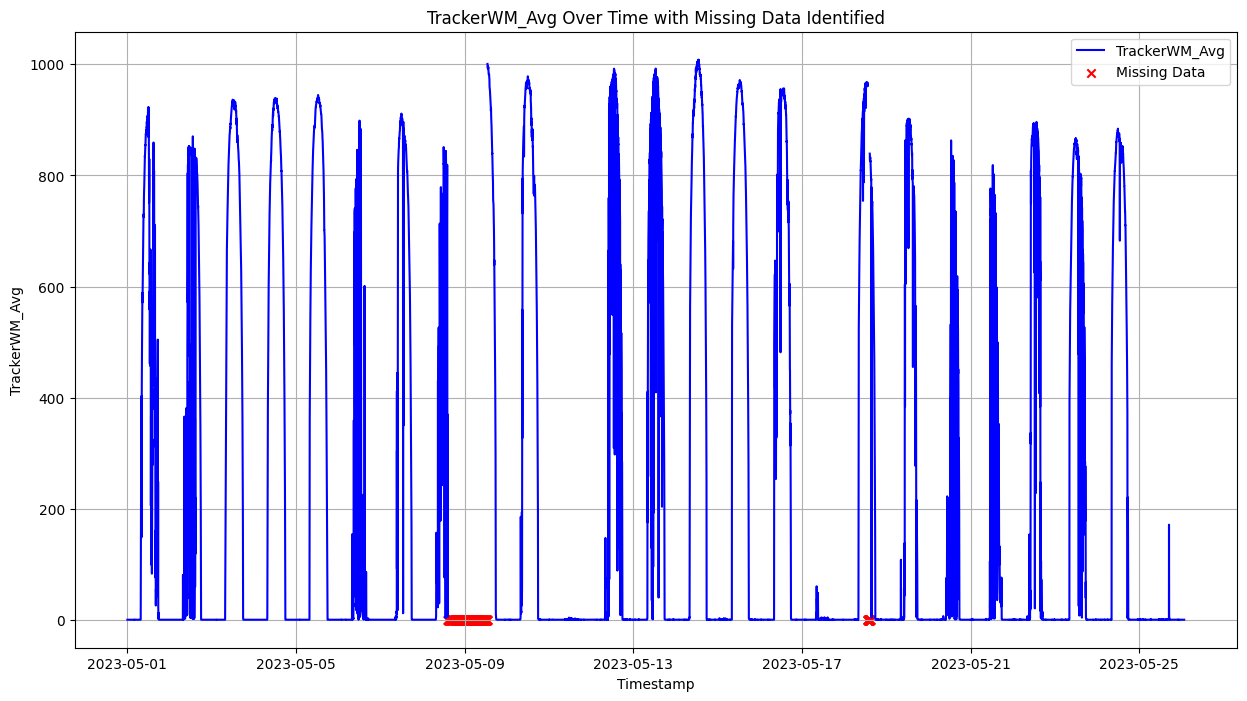

In [110]:
null_records = data[data['TrackerWM_Avg'].isnull()]
# null_records
#Null records between the data range 8 May 2023 and 18 May 2023 

start_date = '2023-05-01'
end_date = '2023-05-25'
data = filtered_data[(filtered_data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

# Plot the "TrackerWM_Avg" over time
plt.figure(figsize=(15, 8))
plt.plot(data['TmStamp'], data['TrackerWM_Avg'], label='TrackerWM_Avg', color='blue')

# Highlight missing data points
missing_data = data[data['TrackerWM_Avg'].isnull()]
plt.scatter(missing_data['TmStamp'], [0] * len(missing_data), color='red', label='Missing Data', marker='x')

# Formatting the plot
plt.title('TrackerWM_Avg Over Time with Missing Data Identified')
plt.xlabel('Timestamp')
plt.ylabel('TrackerWM_Avg')
plt.legend()
plt.grid(True)
plt.show()

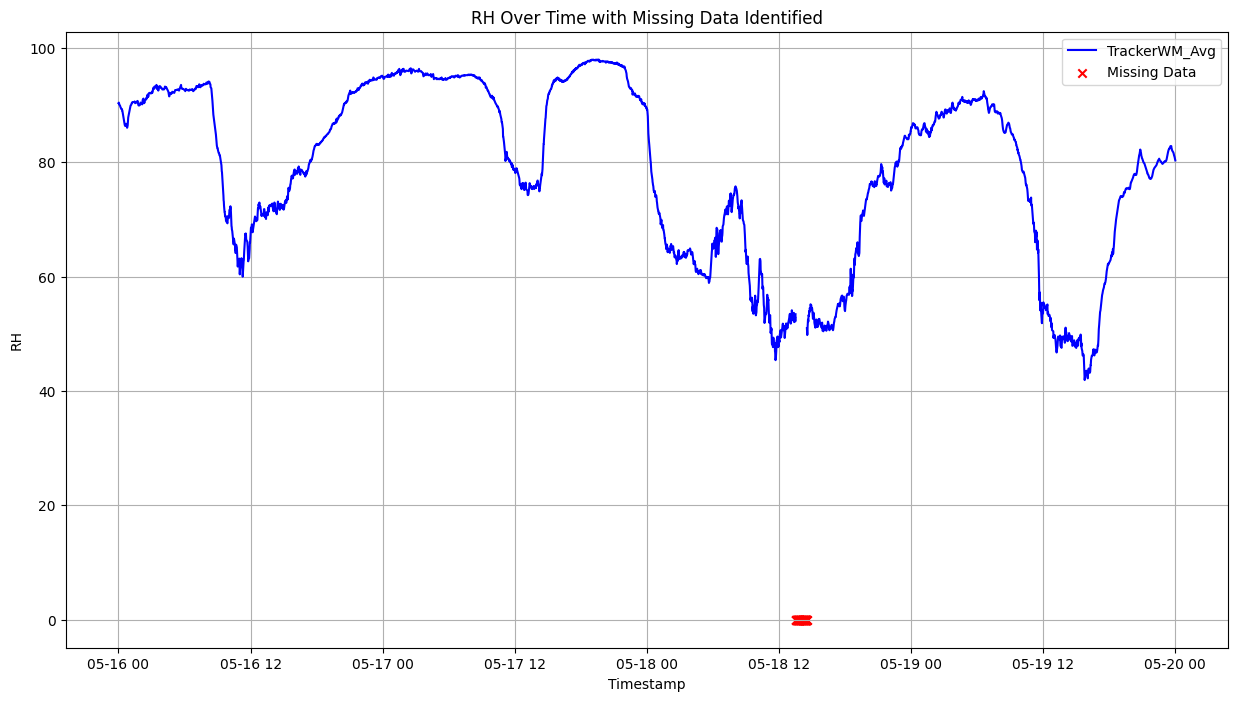

In [112]:
null_records = data[data['RH'].isnull()]
# null_records
#18 May missing

start_date = '2023-05-16'
end_date = '2023-05-20'
data = filtered_data[(filtered_data['TmStamp'] >= start_date) & (data['TmStamp'] <= end_date)]

# Plot the "TrackerWM_Avg" over time
plt.figure(figsize=(15, 8))
plt.plot(data['TmStamp'], data['RH'], label='TrackerWM_Avg', color='blue')

# Highlight missing data points
missing_data = data[data['RH'].isnull()]
plt.scatter(missing_data['TmStamp'], [0] * len(missing_data), color='red', label='Missing Data', marker='x')

# Formatting the plot
plt.title('RH Over Time with Missing Data Identified')
plt.xlabel('Timestamp')
plt.ylabel('RH')
plt.legend()
plt.grid(True)
plt.show()

By visualizing the missing data across the variables, forward fill/backward fill or linear interpolation

In [115]:
filtered_data['TrackerWM_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['ShadowWM_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['SunWM_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['ShadowbandWM_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['DNICalc_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['AirTC_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['RH'].fillna( method ='ffill', inplace = True) 
filtered_data['WS_ms_S_WVT'].fillna( method ='ffill', inplace = True) 
filtered_data['WindDir_D1_WVT'].fillna( method ='ffill', inplace = True) 
filtered_data['WindDir_SD1_WVT'].fillna( method ='ffill', inplace = True) 
filtered_data['BP_mB_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['UVA_Avg'].fillna( method ='ffill', inplace = True) 
filtered_data['UVB_Avg'].fillna( method ='ffill', inplace = True) 

filtered_data.isnull().sum() 

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_33121/4136915630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['TrackerWM_Avg'].fillna( method ='ffill', inplace = True)
/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_33121/4136915630.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data['TrackerWM_Avg'].fillna( method ='ffill', inplace = True)
/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh000

Classroom Type         0
Measured T             2
School Day             0
School Hours           0
Break Time             0
Power On               0
Outdoor Temperature    0
TmStamp                0
TrackerWM_Avg          0
ShadowWM_Avg           0
SunWM_Avg              0
ShadowbandWM_Avg       0
DNICalc_Avg            0
AirTC_Avg              0
RH                     0
WS_ms_S_WVT            0
WindDir_D1_WVT         0
WindDir_SD1_WVT        0
BP_mB_Avg              0
UVA_Avg                0
UVB_Avg                0
Month                  0
Day                    0
Hour                   0
Minute                 0
dtype: int64

**Predictor Variable Analysis**

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_33121/917229246.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_mean, x='Hour', y='Measured T', hue='Classroom Type', ci=None)


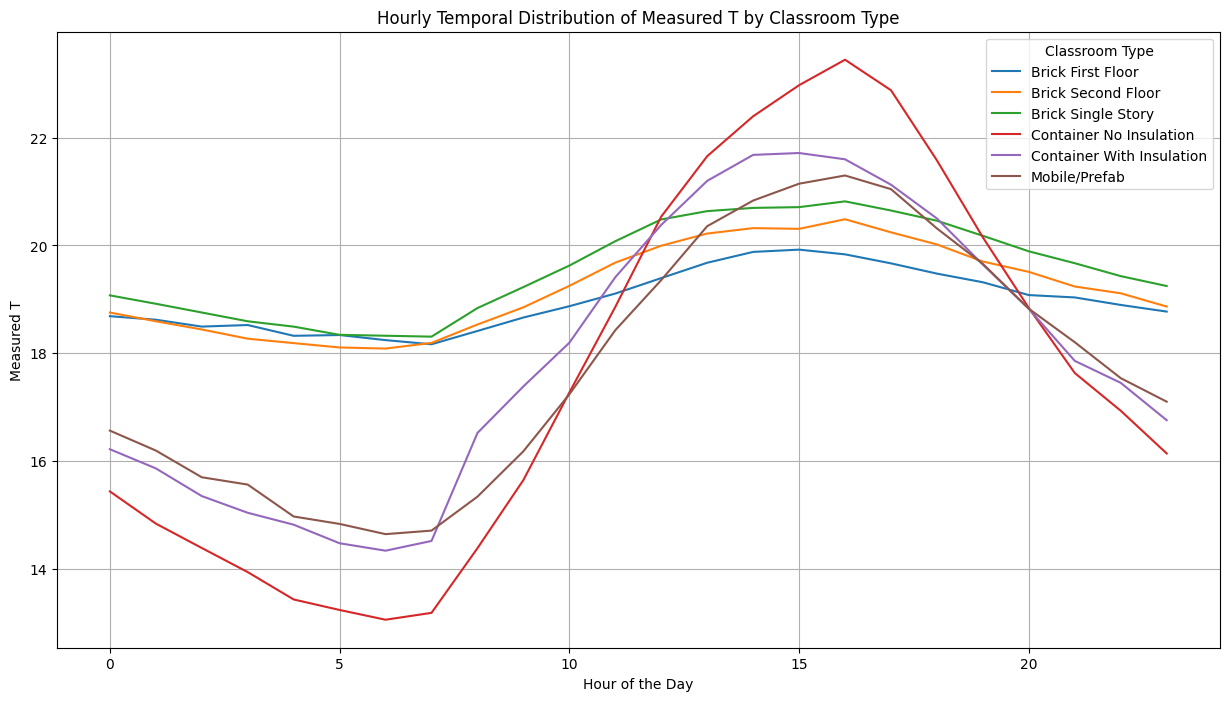

In [66]:
# Group by hour and classroom type, then calculate the mean
hourly_mean = data.groupby(['Hour', 'Classroom Type'])['Measured T'].mean().reset_index()

# Plot the hourly temporal distribution of "Measured T" by different classroom types
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_mean, x='Hour', y='Measured T', hue='Classroom Type', ci=None)
plt.title('Hourly Temporal Distribution of Measured T by Classroom Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Measured T')
plt.legend(title='Classroom Type')
plt.grid(True)
plt.show()

/var/folders/sr/cf_jdmpx78952kg9qz2tkjqh0000gn/T/ipykernel_33121/2077850808.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_mean_school_day, x='Hour', y='Measured T', hue='Classroom Type', style='School Day', ci=None)


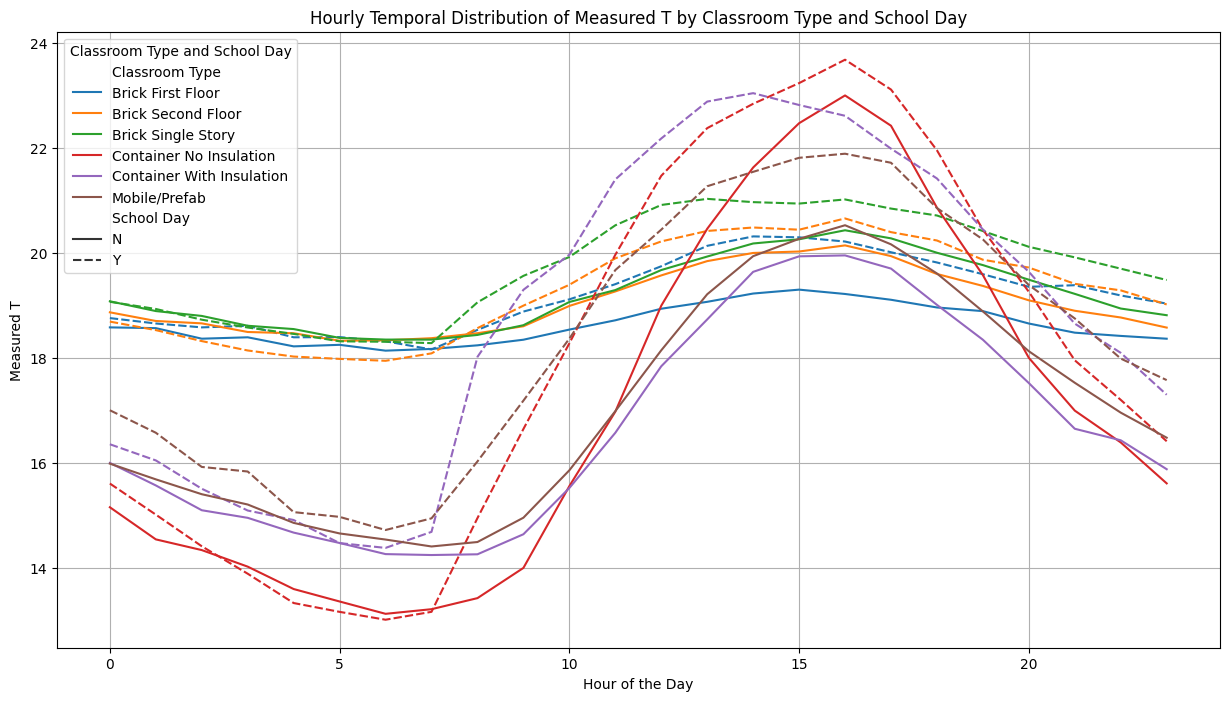

In [67]:
# Group by hour, classroom type, and school day, then calculate the mean
hourly_mean_school_day = data.groupby(['Hour', 'Classroom Type', 'School Day'])['Measured T'].mean().reset_index()

# Plot the hourly temporal distribution of "Measured T" by classroom type and school day
plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_mean_school_day, x='Hour', y='Measured T', hue='Classroom Type', style='School Day', ci=None)
plt.title('Hourly Temporal Distribution of Measured T by Classroom Type and School Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Measured T')
plt.legend(title='Classroom Type and School Day')
plt.grid(True)
plt.show()

In [36]:
# Inspect the First 5 rows of the Data Frame.
filtered_data.head()

,Classroom Type,Measured T,School Day,School Hours,Break Time,Power On,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,...,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
0,Brick First Floor,23.2,Y,N,N,On,21.71144,2023-03-16 07:17:00,0.000000,40.948692,...,0.000,0.00,0.000,992.75995,0.019592,0.009415,3,16,7,17
1,Brick Second Floor,23.5,Y,N,N,On,21.71144,2023-03-16 07:18:00,0.000000,41.603010,...,0.000,0.00,0.000,992.75430,0.019592,0.009391,3,16,7,18
2,Brick Second Floor,23.9,Y,N,N,On,21.71144,2023-03-16 07:19:00,0.000000,41.926994,...,0.000,0.00,0.000,992.71936,0.019248,0.009368,3,16,7,19
3,Brick First Floor,23.4,Y,N,N,On,22.16053,2023-03-16 07:27:00,1.807560,46.710484,...,0.838,24.19,5.783,992.77124,0.018905,0.009368,3,16,7,27
4,Brick Second Floor,22.9,Y,N,N,On,22.38508,2023-03-16 07:33:00,0.823522,66.143000,...,0.000,0.00,0.000,992.73060,0.019936,0.009368,3,16,7,33


In [37]:
# Inspect the Last 5 rows of the Data Frame.
filtered_data.tail()

,Classroom Type,Measured T,School Day,School Hours,Break Time,Power On,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,...,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
369692,Brick Single Story,24.7,Y,N,N,On,12.9778,2023-11-06 23:57:00,0.0,0.0,...,2.387,349.1,18.96,1001.34780,0.660200,0.078320,11,6,23,57
369693,Container With Insulation,21.5,Y,N,N,On,12.9778,2023-11-06 23:57:00,0.0,0.0,...,2.387,349.1,18.96,1001.34780,0.660200,0.078320,11,6,23,57
369694,Container No Insulation,20.1,Y,N,N,On,12.9778,2023-11-06 23:58:00,0.0,0.0,...,1.316,355.3,22.45,1001.40533,0.660196,0.078343,11,6,23,58
369695,Mobile/Prefab,21.6,Y,N,N,On,12.9778,2023-11-06 23:58:00,0.0,0.0,...,1.316,355.3,22.45,1001.40533,0.660196,0.078343,11,6,23,58
369696,Brick Single Story,25.0,Y,N,N,On,12.9778,2023-11-06 23:59:00,0.0,0.0,...,1.161,356.1,49.77,1001.40080,0.660191,0.079210,11,6,23,59


# DESCRIPTIVE STATISTICS

In [38]:
filtered_data.describe()

,Measured T,Outdoor Temperature,TmStamp,TrackerWM_Avg,ShadowWM_Avg,SunWM_Avg,ShadowbandWM_Avg,DNICalc_Avg,AirTC_Avg,RH,WS_ms_S_WVT,WindDir_D1_WVT,WindDir_SD1_WVT,BP_mB_Avg,UVA_Avg,UVB_Avg,Month,Day,Hour,Minute
count,369695.000000,369697.000000,369697,369017.000000,369041.000000,369359.000000,369581.000000,369441.000000,369365.000000,369619.000000,369619.000000,369619.000000,369619.000000,369619.000000,369619.000000,369619.000000,369697.000000,369697.000000,369697.000000,369697.000000
mean,18.549726,14.325424,2023-08-05 09:55:50.941176064,189.220255,56.366514,173.183496,104.173214,207.449406,14.570001,75.804619,2.079520,160.859871,14.931749,1002.253063,0.567278,0.042058,7.637027,15.986300,11.536583,29.691112
min,4.300000,3.797800,2023-03-16 07:17:00,0.000000,0.000000,0.000000,0.000000,-332.721830,2.356000,15.990000,0.000000,0.000000,0.000000,988.895700,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,15.700000,10.512350,2023-06-16 05:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,11.230000,62.490000,0.472000,36.695000,1.954000,998.448150,0.153403,0.000000,6.000000,8.000000,5.000000,14.000000
50%,18.200000,13.290530,2023-08-14 09:47:00,0.000000,0.000000,0.068787,0.000000,0.000000,13.830000,79.540000,1.614000,146.600000,14.950000,1001.566700,0.288921,0.011079,8.000000,17.000000,12.000000,30.000000
75%,21.200000,17.269620,2023-09-26 17:07:00,217.940280,71.712720,258.281040,99.473976,211.381650,17.410000,92.000000,3.175000,281.500000,24.000000,1005.319950,0.950000,0.086832,9.000000,24.000000,18.000000,45.000000
max,34.800000,34.997803,2023-11-06 23:59:00,1078.296400,754.250600,2978.762500,1275.597500,2663.851300,35.540000,100.000000,12.960000,360.000000,95.100000,1025.066300,3.547195,0.185270,11.000000,31.000000,23.000000,59.000000
std,4.247772,5.234521,NaN,336.065049,96.178492,283.832811,208.149294,375.138494,5.059247,18.620429,1.928751,123.706774,12.221072,5.272662,0.538964,0.048291,2.089855,9.108592,6.964154,17.379407


**Observations:** Descriptive statistics indicate that all features have different means and standard deviations. This may necessitate data standardization later.

# STATISTICAL ANALYSIS OF VARIABLES

This section covers three main aspects of statistical analysis: univariate analysis, outlier detection, and correlation analysis.

Firstly, univariate analysis helps us understand how individual variables are distributed and whether they follow a normal pattern. We use histograms to create visual representations of these distributions, which show us how data points are spread out and whether there are any noticeable patterns like skewness.

Next, we conduct outlier detection by generating boxplots for each feature. Boxplots allow us to identify any data points that fall significantly outside the typical range, giving us insights into potential anomalies or extremes in the data.

Lastly, correlation analysis explores the relationships between variables. We calculate a correlation matrix using Pearson correlation coefficients, focusing particularly on how each variable relates to 'indoor_temperature'. This matrix is visualized using a heatmap, where different colors indicate the strength of correlations. These insights help us understand potential connections and interdependencies among variables, which are crucial for guiding further analysis and modeling efforts.

**Univariate Analysis**

In [39]:
cols_for_st_analysis = ['Measured T','TrackerWM_Avg', 'ShadowWM_Avg', 'SunWM_Avg', 'ShadowbandWM_Avg', 'DNICalc_Avg', 'AirTC_Avg', 'WS_ms_S_WVT', 'WindDir_SD1_WVT', 'UVA_Avg', 'UVB_Avg']


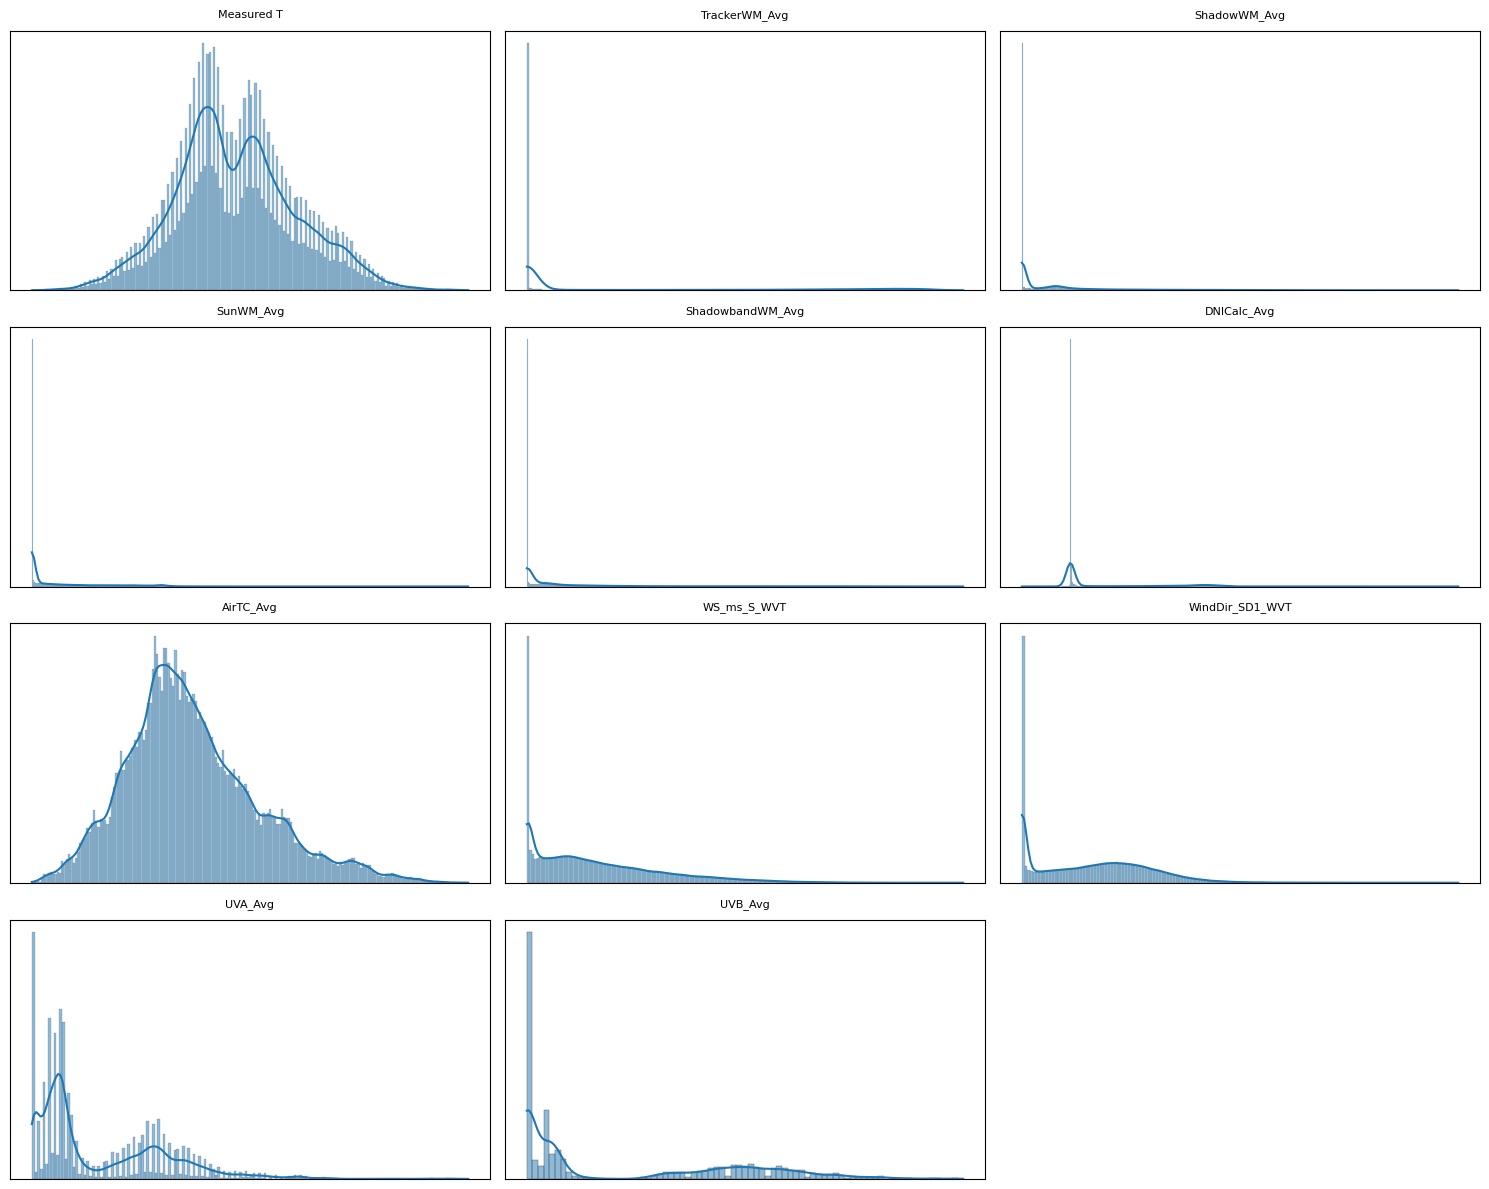

In [43]:
# Generate Histograms to observe data distribution.

# # Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Loop through each axis and plot the histogram
for i, ax in enumerate(axes.flat):
    if i < len(cols_for_st_analysis):
        sns.histplot(data=filtered_data, x=cols_for_st_analysis[i], kde=True, ax=ax, edgecolor=".3")
        ax.set_title(f'{cols_for_st_analysis[i]}', pad=10, fontsize=8)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis='both', which='both', bottom=False, left=False)
    else:
        ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** It seems that the data in most of the features deviate from a normal distribution.

**Outlier Detection**

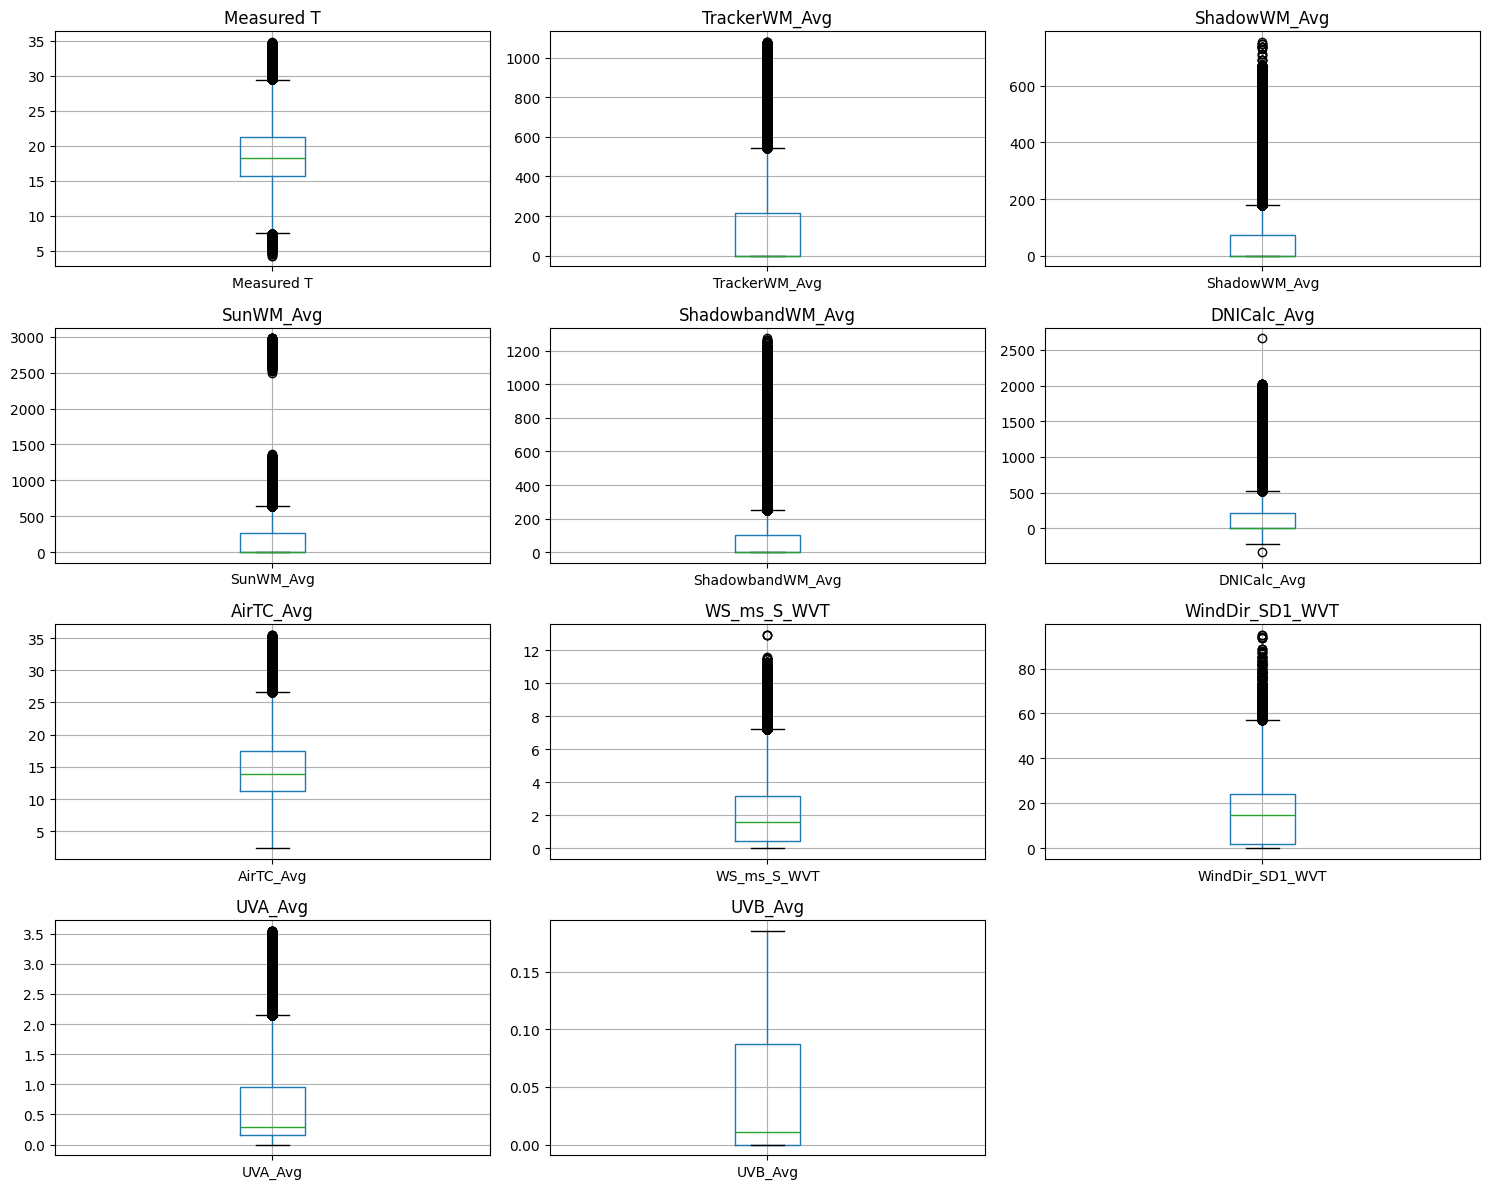

In [45]:
# Generate Boxplots to for outlier detection.

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Loop through each axis and plot the boxplot
for i, ax in enumerate(axes.flat):
    if i < len(cols_for_st_analysis):
        filtered_data.boxplot(column=cols_for_st_analysis[i], ax=ax)
        ax.set_title(cols_for_st_analysis[i])
    else:
        ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:** It appears that all features, except for UVB_Avg, exhibit outliers.

**Correlation Analysis**

In [46]:
corr_matrix_p = round(filtered_data[cols_for_st_analysis].corr(), 2)
corr_matrix_p['Measured T'].sort_values(ascending=False)

Measured T          1.00
AirTC_Avg           0.73
UVB_Avg             0.50
UVA_Avg             0.39
SunWM_Avg           0.33
ShadowbandWM_Avg    0.32
TrackerWM_Avg       0.29
DNICalc_Avg         0.28
WindDir_SD1_WVT     0.26
ShadowWM_Avg        0.23
WS_ms_S_WVT         0.22
Name: Measured T, dtype: float64

<Axes: >

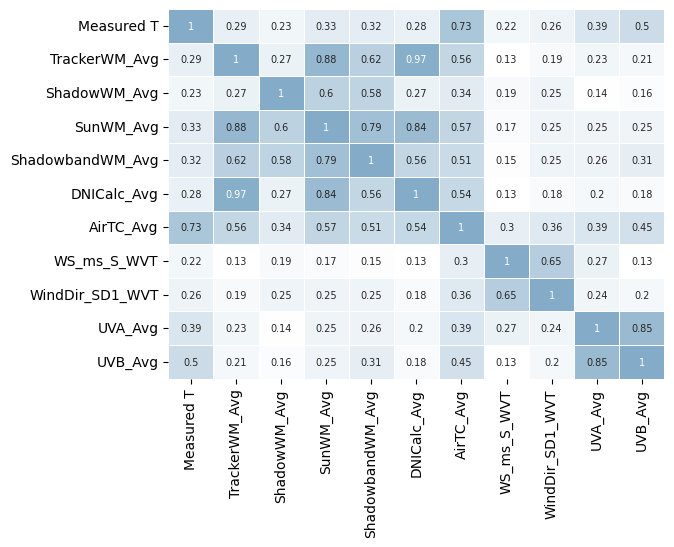

In [48]:
cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', ['#FFFFFF', '#84ACC8'])
sns.heatmap(corr_matrix_p, annot = True, cmap = cmap, linewidths = 0.5, annot_kws={"size": 7}, cbar=False)

**Observations:** External factor that significantly affect indoor temperature include outdoor temperature (0.73) has a positive influence. Average UV B (0.50) and Average UV A (0.39), also moderately affect indoor temperature.

Factors such as Diffuse Horizontal Irradiance (DHI) (0.23) and wind speed (0.22) have weaker correlations with indoor temperature. These findings highlight the environmental variables that significantly impact indoor temperature dynamics.

In [49]:
# Calculate the correlation matrix using Spearman's rank correlation which is better suited for non-normally distributed data
corr_matrix_s = round(filtered_data[cols_for_st_analysis].corr(method='spearman'), 2)
corr_matrix_s['Measured T'].sort_values(ascending=False)

Measured T          1.00
AirTC_Avg           0.71
UVB_Avg             0.49
TrackerWM_Avg       0.31
SunWM_Avg           0.30
ShadowbandWM_Avg    0.30
UVA_Avg             0.30
DNICalc_Avg         0.29
ShadowWM_Avg        0.27
WindDir_SD1_WVT     0.26
WS_ms_S_WVT         0.24
Name: Measured T, dtype: float64

# FIXED PARTITIONING

---
This section outlines a simple method to split our temperature data into two parts: one for training our forecasting model and another for testing its accuracy. When splitting time series data, two key considerations are crucial:

- Ensure the split is in chronological order.
- Account for seasonality to guarantee each period encompasses a complete set of seasons. This prevents uneven representation of months or other periodic patterns in the data. This approach differs from traditional train-validation-test splits in the non-time series datasets.

In [119]:
filtered_data = data.sort_values(by='TmStamp')
filtered_data = filtered_data.reset_index(drop=True)
target = filtered_data['Measured T']
raw_data = filtered_data

In [120]:
raw_data.shape

(5298, 25)

In [121]:
target.shape

(5298,)

In [122]:
train_percent = 0.7       # percentage of data for training
val_percent = 0.1         # percentage of data for validation

train_split = int(len(raw_data)*train_percent)
val_split   = int(len(raw_data)*(train_percent+val_percent))

train_set = raw_data[:train_split]            # training dataset
val_set   = raw_data[train_split:val_split]   # validation dataset
test_set  = raw_data[val_split:]              # testing dataset

print('Total samples:', raw_data.shape[0])
print('Train Samples:', train_set.shape[0])
print('Validation Samples:', val_set.shape[0])
print('Test Samples:', test_set.shape[0])

Total samples: 5298
Train Samples: 3708
Validation Samples: 530
Test Samples: 1060
